In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data in to pyton environment
complaint_data_df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
complaint_data_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
#to find the type of data
type(complaint_data_df)

pandas.core.frame.DataFrame

In [6]:
complaint_data_df.shape

(2224, 11)

In [7]:
complaint_data_df.size

24464

In [8]:
complaint_data_df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
complaint_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [10]:
# to cast 'Date_month_year' column to datetime format
complaint_data_df["Date_month_year"]= pd.to_datetime(complaint_data_df["Date_month_year"])

In [11]:
complaint_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

## To plot no.of complaints in daily basis

<AxesSubplot:>

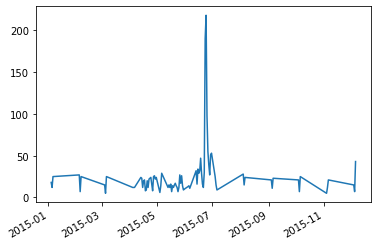

In [12]:
complaint_data_df["Date_month_year"].value_counts().plot()

In [13]:
complaint_data_df["Date"].value_counts()[:3]

24-06-15    218
23-06-15    190
25-06-15     98
Name: Date, dtype: int64

## To find no. of compalints - monthly basis

In [16]:
#adding new column
complaint_data_df["Month"]=pd.DatetimeIndex(complaint_data_df["Date_month_year"]).month

In [18]:
complaint_data_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [19]:
#to select columns using loc
no_of_complaints_monthly=complaint_data_df.loc[:,["Month","Customer Complaint"]].sort_values(by=["Month"])

In [20]:
no_of_complaints_monthly

,Month,Customer Complaint
1951,1,Interrnet Service
1415,1,overcharged
364,1,Comcast poor service
1410,1,Comcast Lied About Pricing And Installation
512,1,Comcast Internet Service Bad Quality
...,...,...
1161,12,Fraudulent Billing practices by Comcast
2076,12,Comcast monopoly
1157,12,Comcast Unfair Billing Practices
1602,12,Comcast Billing (primary) Service (secondary)


<AxesSubplot:xlabel='Month'>

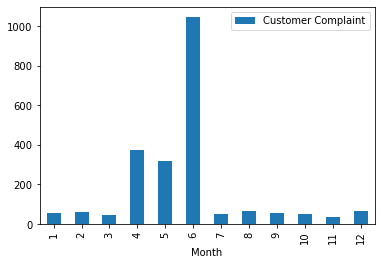

In [21]:
#trend chart for the number of complaints at monthly basis
no_of_complaints_monthly.groupby('Month').count().plot.bar()

In [22]:
no_of_complaints_monthly.groupby('Month').count()[:12]

,Customer Complaint
Month,
1,55
2,59
3,45
4,375
5,317
6,1046
7,49
8,67
9,55


#the month june have maximum customer complaint of 1046

## To create a new column 'Complaint type'

In [23]:
complaint_data_df["Complaint type"]=np.where((complaint_data_df["Customer Complaint"].str.contains("Internet " ))|
                                                           (complaint_data_df["Customer Complaint"].str.contains(" internet" ))|
                                                           (complaint_data_df["Customer Complaint"].str.contains(" Speed " ))|
                                                           (complaint_data_df["Customer Complaint"].str.contains(" EMAIL" ))|
                                                           (complaint_data_df["Customer Complaint"].str.contains(" data" ))|
                                                           (complaint_data_df["Customer Complaint"].str.contains(" INTERNET " )), "around internet",
                                                          np.where((complaint_data_df["Customer Complaint"].str.contains("Comcast"))|
                                                                  (complaint_data_df["Customer Complaint"].str.contains("service"))|
                                                                  (complaint_data_df["Customer Complaint"].str.contains(" Service Availability"))|
                                                                  (complaint_data_df["Customer Complaint"].str.contains("COMCAST!"))|
                                                                  (complaint_data_df["Customer Complaint"].str.contains(" Cable prices"))|
                                                                   (complaint_data_df["Customer Complaint"].str.contains("billing")),
                                                                   "network issue","across other domains"))

In [24]:
complaint_data_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint type
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,around internet
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,network issue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,across other domains
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,network issue
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,network issue


In [25]:
complaint_data_df["Complaint type"].unique()

array(['around internet', 'network issue', 'across other domains'],
      dtype=object)

In [26]:
complaint_data_df["Complaint type"].value_counts()


network issue           1066
across other domains     655
around internet          503
Name: Complaint type, dtype: int64

<AxesSubplot:>

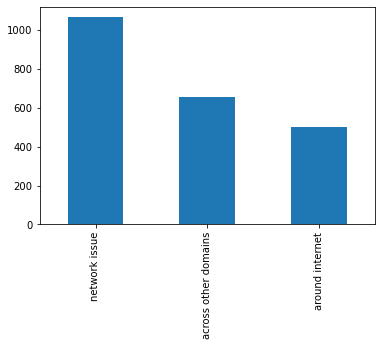

In [27]:
complaint_data_df["Complaint type"].value_counts().plot.bar()

Customer Compaints are grouped into 3 types- 'around internet' 'network issue', 'across other domains', of which the maximum complaints are related to 'network issue'.

## Creating new categorical variable

In [28]:
#Creating new categorical variable with value as Open and Closed. 
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [29]:
complaint_data_df.Status.head(15)

0      Closed
1      Closed
2      Closed
3        Open
4      Solved
5      Solved
6     Pending
7      Solved
8      Closed
9        Open
10     Closed
11     Closed
12       Open
13     Solved
14     Solved
Name: Status, dtype: object

In [30]:
complaint_data_df["newStatus"]=np.where((complaint_data_df["Status"].str.contains("Open"))|
                                        (complaint_data_df["Status"].str.contains("Pending")),"Open","Closed")
complaint_data_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint type,newStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,around internet,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,network issue,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,across other domains,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,network issue,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,network issue,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,across other domains,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,network issue,Closed
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,across other domains,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,network issue,Closed


## To Provide state wise status of complaints

In [31]:
complaint_data_df.groupby(["State"]).size().sort_values(ascending=False)

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

<AxesSubplot:xlabel='State'>

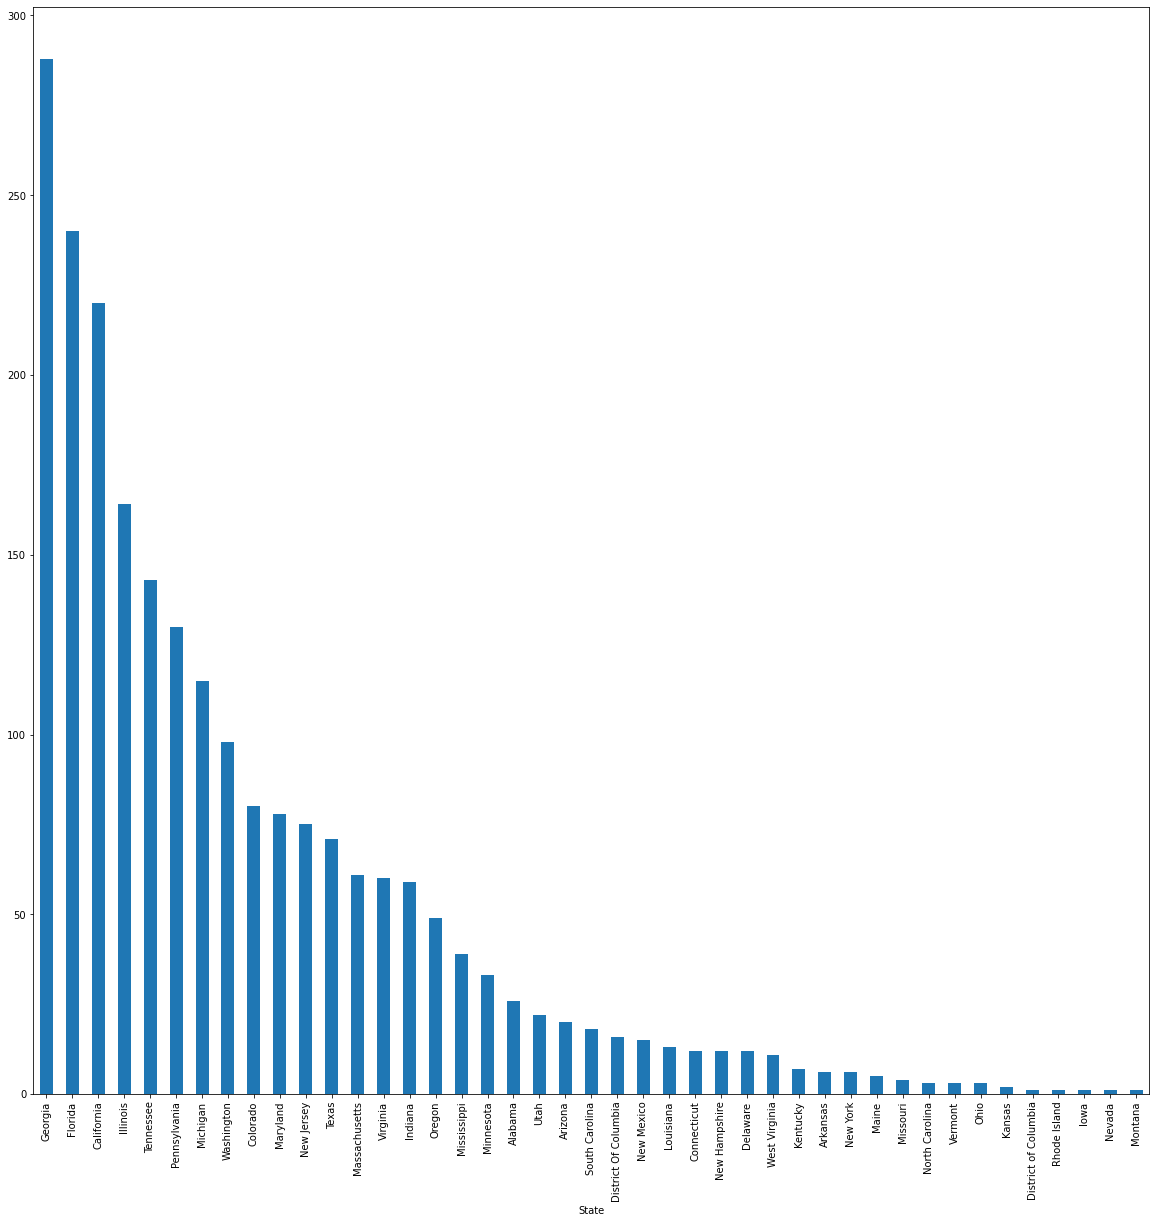

In [32]:
complaint_data_df.groupby(["State"]).size().sort_values(ascending=False).plot.bar(figsize=(20,20))

In [33]:
complaint_data_df.groupby(['State',"newStatus"]).size().unstack().fillna(0)

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='State'>

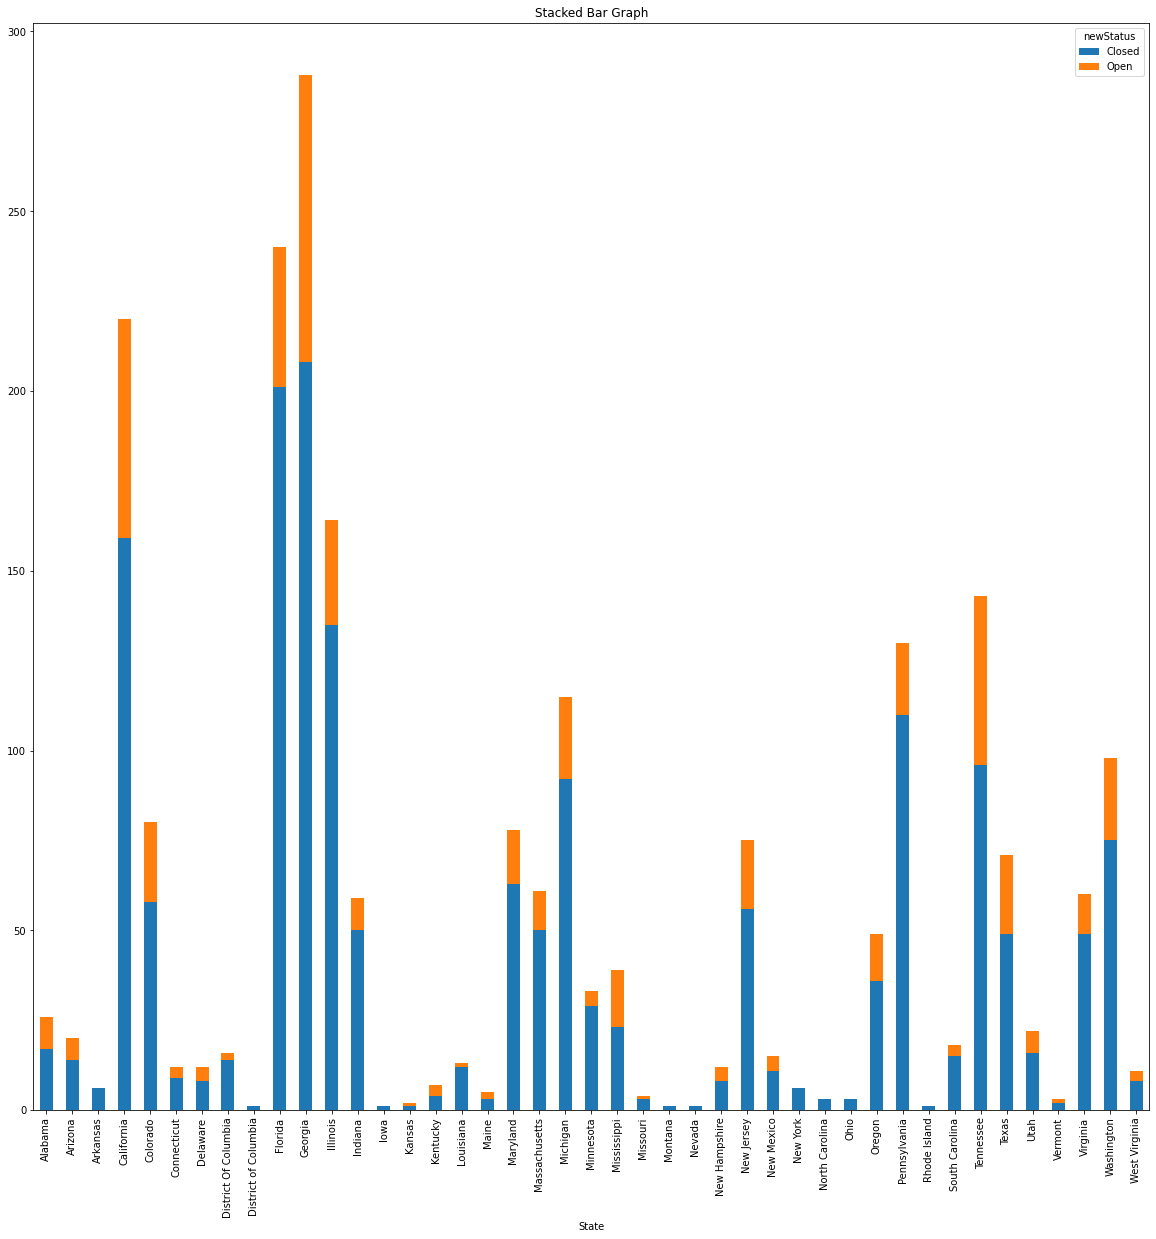

In [34]:
complaint_data_df.groupby(['State',"newStatus"]).size().unstack().fillna(0).plot( kind='bar', stacked=True,figsize=(20,20),
        title='Stacked Bar Graph')

In [35]:
complaint_data_df.groupby(["State"]).size().sort_values(ascending=False)[:3]

State
Georgia       288
Florida       240
California    220
dtype: int64

In [36]:
#state that has the maximum complaints. Series.idxmax() function return the row label of the maximum value.

complaint_data_df.groupby(["State"]).size().sort_values(ascending=False).idxmax()

'Georgia'

In [37]:
# closed and open complaint status of 'Georgia'
complaint_data_df.groupby(['State',"newStatus"]).size().unstack().fillna(0).max()

newStatus
Closed    208.0
Open       80.0
dtype: float64

In [38]:
#To find the state has the highest percentage of unresolved complaints
complaint_group1=complaint_data_df.groupby(['State',"newStatus"]).size().unstack().fillna(0)

In [39]:
complaint_group1["unresolved"]=complaint_group1["Open"]/complaint_group1["Open"].sum()*100

In [40]:
complaint_group1["unresolved"]

State
Alabama                  1.740812
Arizona                  1.160542
Arkansas                 0.000000
California              11.798839
Colorado                 4.255319
Connecticut              0.580271
Delaware                 0.773694
District Of Columbia     0.386847
District of Columbia     0.000000
Florida                  7.543520
Georgia                 15.473888
Illinois                 5.609284
Indiana                  1.740812
Iowa                     0.000000
Kansas                   0.193424
Kentucky                 0.580271
Louisiana                0.193424
Maine                    0.386847
Maryland                 2.901354
Massachusetts            2.127660
Michigan                 4.448743
Minnesota                0.773694
Mississippi              3.094778
Missouri                 0.193424
Montana                  0.000000
Nevada                   0.000000
New Hampshire            0.773694
New Jersey               3.675048
New Mexico               0.773694
New York

In [41]:
complaint_group1["unresolved"].sort_values().idxmax()

'Georgia'

In [42]:
complaint_group1["unresolved"].sort_values().max()

15.473887814313347

The state has the highest percentage of unresolved complaints is 'Georgia' with 15.47%.

## To Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [43]:
complaint_data_df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [44]:
 #the complaints  received through the Internet and customer care calls.

In [45]:
complaint_group2=complaint_data_df.groupby(['Received Via','newStatus']).size().unstack().fillna(0)

In [46]:
complaint_group2

newStatus,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Received Via'>

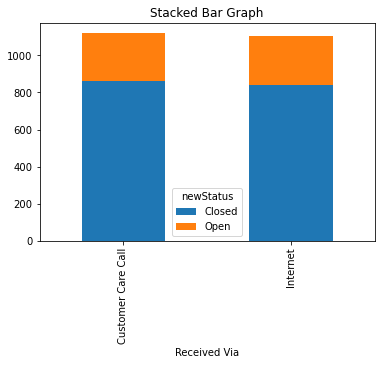

In [47]:
complaint_group2.plot( kind='bar', stacked=True,
        title='Stacked Bar Graph')

In [48]:
 # the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [49]:
complaint_group2["resolved"]=complaint_group2['Closed']/complaint_group2['Closed'].sum()*100

In [50]:
complaint_group2["resolved"].sort_values()

Received Via
Internet              49.384886
Customer Care Call    50.615114
Name: resolved, dtype: float64

So,   the percentage of complaints resolved till date, which were received through the Internet is 49.3%.
The percentage of complaints resolved till date, which were received through customer care calls is 50.6%.